In [44]:
ll = ['beagle', 'chihuahua', 'doberman', 'french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound', 'tibetan_mastiff']


In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('labels1.csv')
print(df['breed'].value_counts())
df['id'] = df['id'] + ".jpg"

scottish_deerhound    126
beagle                105
pug                    94
saint_bernard          84
malamute               81
doberman               74
chihuahua              71
french_bulldog         70
tibetan_mastiff        69
golden_retriever       67
Name: breed, dtype: int64


In [47]:
df.replace(to_replace = ['beagle', 'chihuahua', 'doberman', 'french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound', 'tibetan_mastiff'], value = [0,1,2,3,4,5,6,7,8,9], inplace = True)

In [48]:
print(df['breed'].value_counts())

8    126
0    105
6     94
7     84
5     81
2     74
1     71
3     70
9     69
4     67
Name: breed, dtype: int64


In [17]:
print(df.shape)

(841, 2)


In [49]:
import cv2
import matplotlib.pyplot as plt


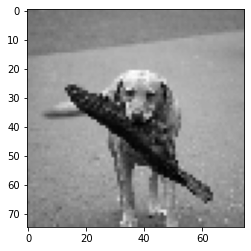

In [50]:
img = cv2.imread(df['id'].iloc[0], cv2.IMREAD_GRAYSCALE)
new_img = cv2.resize(img, (75, 75))
plt.imshow(new_img, cmap = 'gray')
plt.show()

In [29]:
size = 75
train = []
def create_data():
  for i in range(841):
    try:
      img = cv2.imread(df['id'].iloc[i], cv2.IMREAD_GRAYSCALE)
      new_img = cv2.resize(img, (size, size))
      train.append([new_img, df['breed'].iloc[i]])
    except Exception as e:
      pass

create_data()

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
import pickle


In [63]:
X = []
y = []
for data in train:
  X.append(data[0])
  y.append(data[1])

X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)
X = X/255.0


In [76]:
model = Sequential()

model.add(Conv2D(50, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(50, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(50, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(50, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(50))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy','AUC'])

model.fit(X, y, batch_size=2, validation_split = 0.1, epochs = 3)

Epoch 1/3
378/378 [==============================] - 11s 28ms/step - loss: 0.0000e+00 - accuracy: 0.0860 - auc: 0.4924 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - val_auc: 0.5000
Epoch 2/3
378/378 [==============================] - 10s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0860 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - val_auc: 0.5000
Epoch 3/3
378/378 [==============================] - 10s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0860 - auc: 0.5000 - val_loss: 0.0000e+00 - val_accuracy: 0.0706 - val_auc: 0.5000
